# Analysis of fatal traffic crashes in US 2021

**Author**: Álvaro López

The dataset from the Fatality Reporting System (FARS) was created by the National Highway Traffic Safety Administration to provide a measure of highway safety. The dataset collect significant data that describes accidents with at least one family that occured in 2021 in the United States.

Part of the data will be analyzed to understand what variables can affect the severity of an accident.

In [1]:
# Libraries to import
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt

import geopandas as gdp
import wget
from zipfile import ZipFile
import os
import matplotlib.colors as mcolors
from matplotlib.ticker import FuncFormatter
from shapely.geometry import Polygon
import smopy

The dataset is loaded:

In [2]:
df = pd.read_csv('accident.csv', encoding='latin-1')
df.head()

,STATE,STATENAME,ST_CASE,PEDS,PERNOTMVIT,VE_TOTAL,VE_FORMS,PVH_INVL,PERSONS,PERMVIT,...,NOT_MINNAME,ARR_HOUR,ARR_HOURNAME,ARR_MIN,ARR_MINNAME,HOSP_HR,HOSP_HRNAME,HOSP_MN,HOSP_MNNAME,FATALS
0,1,Alabama,10001,0,0,2,2,0,3,3,...,13,22,10:00pm-10:59pm,25,25,23,11:00pm-11:59pm,2,2,2
1,1,Alabama,10002,0,0,1,1,0,2,2,...,Unknown,19,7:00pm-7:59pm,9,9,88,Not Applicable (Not Transported),88,Not Applicable (Not Transported),2
2,1,Alabama,10003,1,1,1,1,0,1,1,...,29,9,9:00am-9:59am,40,40,88,Not Applicable (Not Transported),88,Not Applicable (Not Transported),1
3,1,Alabama,10004,0,0,1,1,0,1,1,...,20,16,4:00pm-4:59pm,28,28,99,Unknown,99,Unknown EMS Hospital Arrival Time,1
4,1,Alabama,10005,0,0,2,2,0,4,4,...,20,22,10:00pm-10:59pm,30,30,88,Not Applicable (Not Transported),88,Not Applicable (Not Transported),1


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39785 entries, 0 to 39784
Data columns (total 80 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   STATE         39785 non-null  int64  
 1   STATENAME     39785 non-null  object 
 2   ST_CASE       39785 non-null  int64  
 3   PEDS          39785 non-null  int64  
 4   PERNOTMVIT    39785 non-null  int64  
 5   VE_TOTAL      39785 non-null  int64  
 6   VE_FORMS      39785 non-null  int64  
 7   PVH_INVL      39785 non-null  int64  
 8   PERSONS       39785 non-null  int64  
 9   PERMVIT       39785 non-null  int64  
 10  COUNTY        39785 non-null  int64  
 11  COUNTYNAME    39785 non-null  object 
 12  CITY          39785 non-null  int64  
 13  CITYNAME      39785 non-null  object 
 14  MONTH         39785 non-null  int64  
 15  MONTHNAME     39785 non-null  object 
 16  DAY           39785 non-null  int64  
 17  DAYNAME       39785 non-null  int64  
 18  DAY_WEEK      39785 non-nu

The dataset is made up of 39785 observations and 80 variables of integer, string and float type define below:

- **STATE**: state number
- **STATENAME**: state name
- **ST_CASE**: consecutive number
- **PEDS**: number of forms submitted for persons not in motor vehicles
- **PERNOTMVIT**: number of persons not in motor vehicles in transport
- **VE_TOTAL**: number of vehicle forms submitted-ALL
- **VE_FORMS**: number of motor vehicles in transport
- **PVH_INVL**: number of parked/working vehicles
- **PERSONS**: number of forms submitted for persons in motor vehicle
- **PERMVIT**: number of persons in motor vehicle in transport
- **COUNTY**: county id
- **COUNTYNAME**: county
- **CITY**: city id
- **CITYNAME**: city
- **MONTH**: month id
- **MONTHNAME**: month
- **DAY**: day
- **DAY_WEEK**: day of week
- **DAY_WEEKNAME**: day of week name
- **YEAR**: year
- **HOUR**: hour id
- **HOURNAME**: hour
- **MINUTE**: minute id
- **MINUTENAME**: minute
- **TWAY_ID**: trafficway id1
- **TWAY_ID2**: trafficway id2
- **ROUTE**: route signing id
- **ROUTNAME**: route name
- **RUR_URB**: land use id
- **RUR_URBNAME**: land use
- **FUNC_SYS**: functional system id
- **FUNC_SYSNAME**: functional system
- **RD_OWNER**: ownership id
- **RD_OWNERNAME**: ownership
- **NHD**: National Highway System id
- **NHDNAME**: National Highway System
- **SP_JUR**: Social Jurisdiction id
- **SP_JURNAME**: Social Jurisdiction
- **MILEPT**: milepoint id
- **MILEPTNAME**: milepoint
- **LATITUDE**: latitude id
- **LATITUDENAME**: latitude
- **LONGITUD**: longitud id
- **LONGITUDNAME**: longitud
- **HARM_EV**: First Harmful Event id
- **HARM_EVNAME**: First Harmful Event
- **MAN_COLL**: Manner of Collision of the First Harmful Event id
- **MAN_COLLNAME**: Manner of Collision of the First Harmful Event
- **RELJCT1**: Relation to Junction-Within Interchange Area id
- **RELJCT1NAME**: Relation to Junction-Within Interchange Area
- **RELJCT2**: Relation to Junction-Specific Area id
- **RELJCT2NAME**: Relation to Junction-Specific Area
- **TYP_INT**: Type of Intersection id
- **TYP_INTNAME**: Type of Intersection
- **REL_ROAD**: Relation of Trafficway id
- **REL_ROADNAME**: Relation of Trafficway
- **WRK_ZONE**: Work Zone id
- **WRK_ZONENAME**: Work Zone
- **LGT_COND**: Light Condition id
- **LGT_CONDNAME**: Light Condition
- **WEATHER**: Atmospheric Condition id
- **WEATHERNAME**: Atmospheric Condition
- **SCH_BUS**: School Bus Related id
- **SCH_BUSNAME**: School Bus Related
- **RAIL**: Rail Grade Crossing Identifier id
- **RAILNAME**: Rail Grade Crossing Identifier
- **NOT_HOUR**: Hour of notification id
- **NOT_HOURNAME**: Hour of notification
- **NOT_MIN**: Minute of notification id
- **NOT_MINNAME**: Minute of notification
- **ARR_HOUR**: Hour of arrival at scene id
- **ARR_HOURNAME**: Hour of arrival at scene
- **ARR_MIN**: Minute of arrival at scene id
- **ARR_MINNAME**: Minute of arrival at scene
- **HOSP_HR**: Hour of EMS Arrival at Hospital id
- **HOSP_HRNAME**: Hour of EMS Arrival at Hospital
- **HOSP_MN**: Minute of EMS Arrival at Hospital id
- **HOSP_MNNAME**: Minute of EMS Arrival at Hospital
- **FATALS**: Fatalities 

We checked if the dataset has missing values:

In [4]:
print(np.where(df.isnull().sum()!=0))

print('Valores nulos variable 26:', df['TWAY_ID2'].isnull().sum())
print('Valores nulos variable 40:', df['MILEPTNAME'].isnull().sum())
print('Valores nulos variable 58:', df['WRK_ZONENAME'].isnull().sum())

(array([26, 40, 58], dtype=int64),)
Valores nulos variable 26: 30019
Valores nulos variable 40: 8158
Valores nulos variable 58: 38907


There are a large number of null values in only three variables, but since they will not be used for data analysis, they are not taken into account.

We checked if the dataset has duplicated samples:

In [5]:
df.duplicated().sum()

0

## Analysis and visualizations


### Fatals

Now we will procees to analyze the dataset through visualizations of some of the variables. First we look at how accident deaths are distributed.

In [6]:
df['FATALS'].value_counts().sort_index()

FATALS
1     36946
2      2395
3       343
4        71
5        19
6         5
8         3
9         1
10        1
13        1
Name: count, dtype: int64

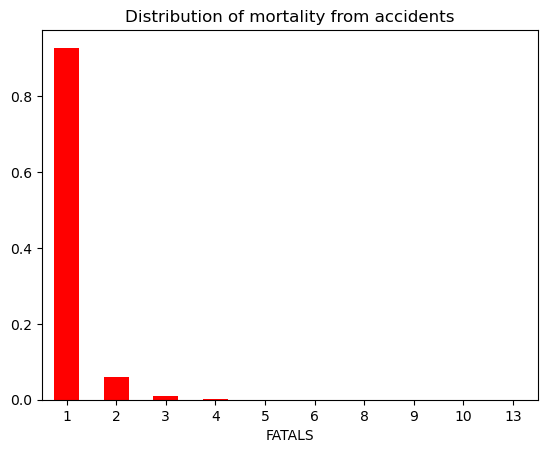

In [7]:
df['FATALS'].value_counts(normalize=True).sort_index().plot(kind='bar',
                                                            color='red',
                                                            rot=0,
                                                            title='Distribution of mortality from accidents')
plt.show()

We see how the majority of accidents have only one death. The frequency decreases as the number of deaths incresases. Of the accidents recorded, the most serious claimed 13 deaths.

### Number of vehicles and persons involved

Regarding the number of vehicles involved in the accidents:

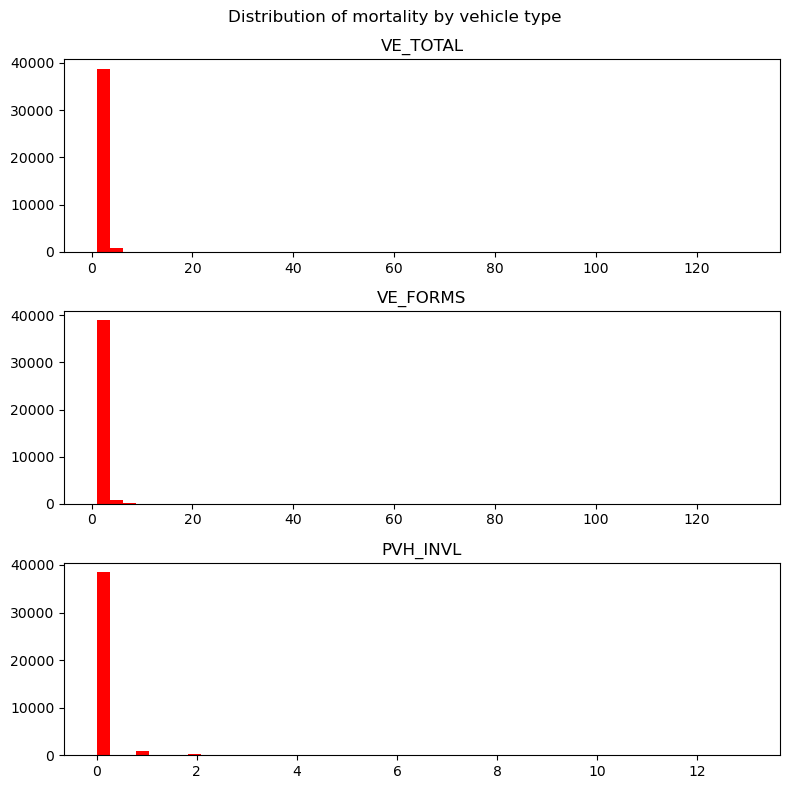

In [8]:
attributes = ['VE_TOTAL', 'VE_FORMS', 'PVH_INVL']

fig, axes = plt.subplots(nrows=3, ncols=1, figsize=(8,8))
ax = axes.flatten()
fig.suptitle('Distribution of mortality by vehicle type')

for index, attribute in enumerate(attributes):
    ax[index].hist(df[attribute], bins=50, color='red')
    ax[index].set_title(attribute)

plt.tight_layout()
plt.show()

In [9]:
df[attributes].describe()

,VE_TOTAL,VE_FORMS,PVH_INVL
count,39785.000000,39785.000000,39785.000000
mean,1.597939,1.553400,0.044539
std,1.042827,1.006025,0.306487
min,1.000000,1.000000,0.000000
25%,1.000000,1.000000,0.000000
50%,1.000000,1.000000,0.000000
75%,2.000000,2.000000,0.000000
max,130.000000,130.000000,13.000000


The number of total (*VE_TOTAL*) and moving (*VE_FORM*) vehicles is 1 in more than 50% of the total. They are followed by 2 vehicles involved, where the 75 percentile is found. On the other hand, in more than 95% of accidents, there was no parked vehicle (*PVH_INVL*) involved (seeing the `value_counts` function).

The maximum number of vehicles that were involved in an accident was 130, all of then in motion.

Regarding the number of persons involved in the accidents:

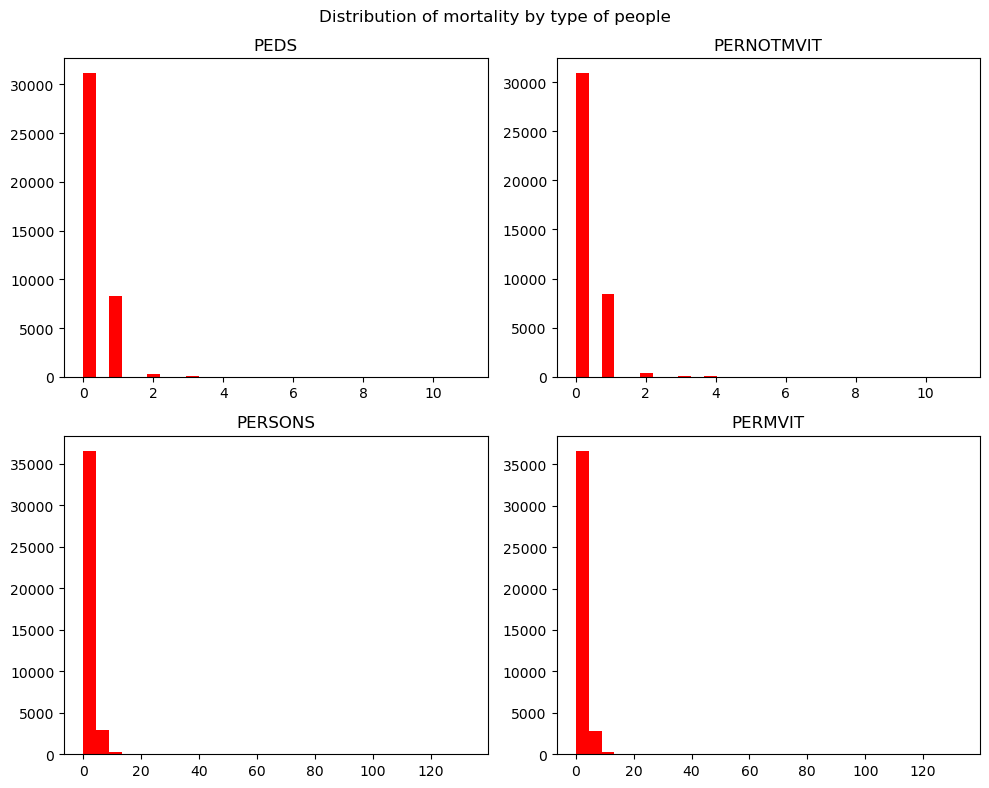

In [10]:
attributes = ['PEDS', 'PERNOTMVIT', 'PERSONS', 'PERMVIT']

fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(10,8))
ax = axes.flatten()
fig.suptitle('Distribution of mortality by type of people')

for index, attribute in enumerate(attributes):
    ax[index].hist(df[attribute], bins=30, color='red')
    ax[index].set_title(attribute)

plt.tight_layout()
plt.show()

In [11]:
df[attributes].describe()

,PEDS,PERNOTMVIT,PERSONS,PERMVIT
count,39785.000000,39785.000000,39785.000000,39785.000000
mean,0.232123,0.244188,2.218826,2.206761
std,0.473279,0.502725,1.845675,1.841587
min,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,1.000000,1.000000
50%,0.000000,0.000000,2.000000,2.000000
75%,0.000000,0.000000,3.000000,3.000000
max,11.000000,11.000000,133.000000,133.000000


Both the variables *PEDS* with *PERNOTMVIT* and *PERSONS* with *PERMVIT* are similar, because some are the forms presented and others are the total number. In almost 80% of the accidents there were no pedestrians or other people who were not in motor vehicles due to the type of roads analyzed. On the other hand, the 50th percentile of the number of occupants in motor vehicles is 2 and the 75th percentil is 3.

A curious fact is that there are 24 accidents where no motor vehicle occupant was involved, it may be because the people involved were pedestrians, cyclists or other vehicles.

Regarding the most serious accidents of each vehicle, 11 people from non-motorized vehicles were involved in one and 133 were involved in the largest accident involving motorized vehicles.

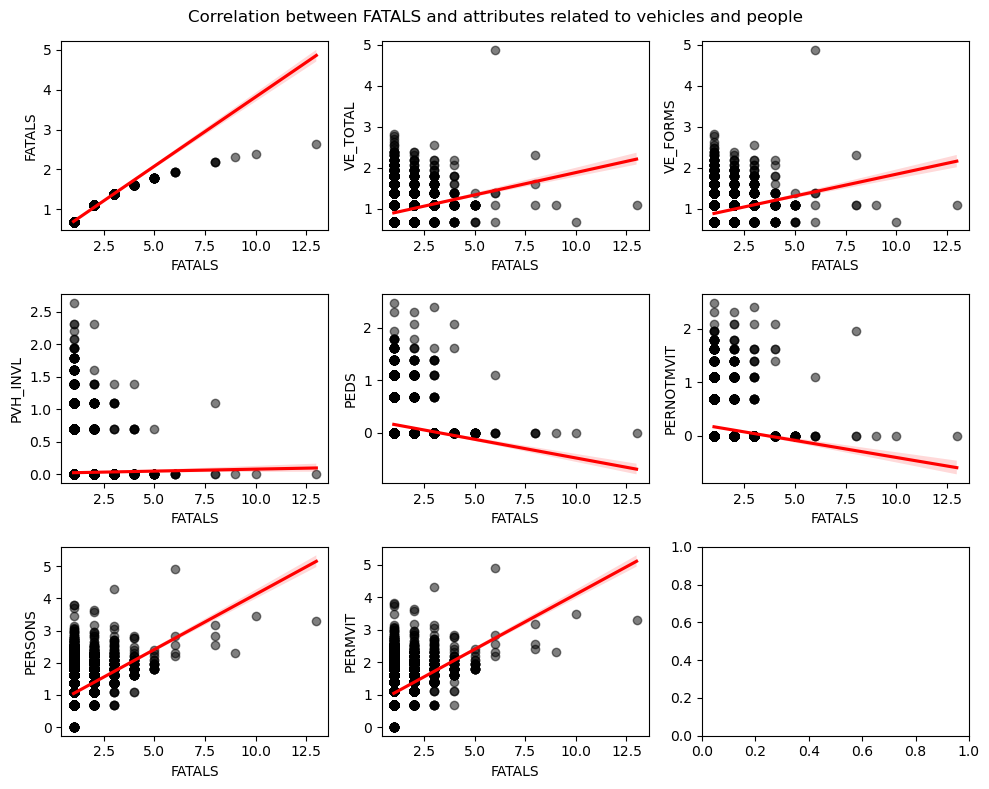

In [12]:
attributes = ['FATALS','VE_TOTAL','VE_FORMS','PVH_INVL','PEDS','PERNOTMVIT','PERSONS','PERMVIT']

fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(10,8))
ax = axes.flatten()
fig.suptitle("Correlation between FATALS and attributes related to vehicles and people")

for index, attribute in enumerate(attributes):
    sns.regplot(x = df['FATALS'], y = np.log(1 + df[attribute]),
                scatter_kws = {"color": "black", "alpha": 0.5},
                line_kws = {"color": "red"}, ax=ax[index])

plt.tight_layout()
plt.show()

We can see that an increase in five of the seven variables implies an increase in deaths in the accident. Only *PEDS* and *PERNOTMVIT* have a negative regression with *FATALS*.

The factors that increase the number of deaths the most are people who were in motorized vehicles.

The correlation matrix between these variables is the following:

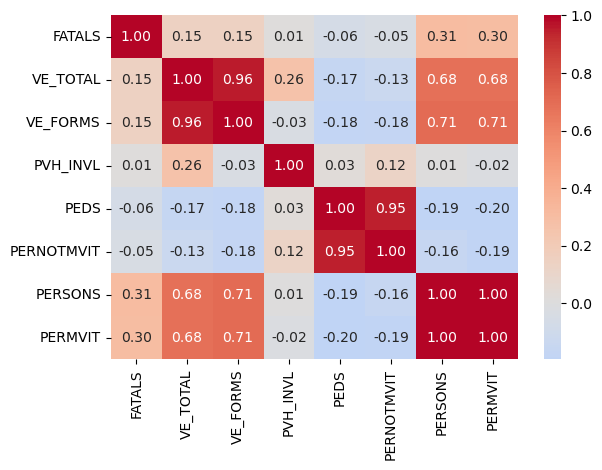

In [13]:
corr_data = df[attributes].corr()
sns.heatmap(corr_data, annot=True, fmt='.2f', cmap='coolwarm', center=0)

plt.tight_layout()
plt.show()

We can observe the following:
- As mentioned, a high correlation was already expected between *PEDS* and *PERNOTMVIT* and between *PERSONS* and *PERMVIT*. There is also a very high positive correlation between the number of vehicles involved in the accident and those that are not parked.
- The more vehicles involved (three hundredths more than those not parked), the more occupants and drivers involved.
- The most significant negative correlation is -0.20 between the number of occupants of motorized vehicles and the number of people in non-motorized vehicles.

### Days of the week and months

Next, we will observe the values of the days and months in which the accidents occurred.

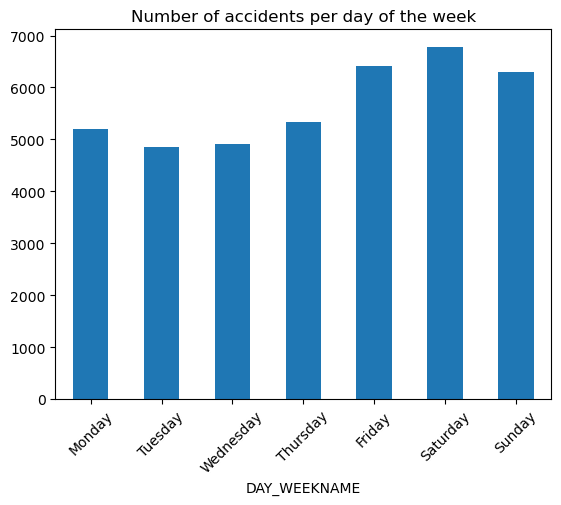

In [14]:
days_cat = ['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday']

df['DAY_WEEKNAME'].value_counts().reindex(days_cat).plot(kind='bar',
                                                         rot=45,
                                                         title='Number of accidents per day of the week')
plt.show()

According to the bar chart, starting on Tuesday, the number of accidents increases, reaching Saturday as the day with the most accidents, and the decreases until Tuesday.

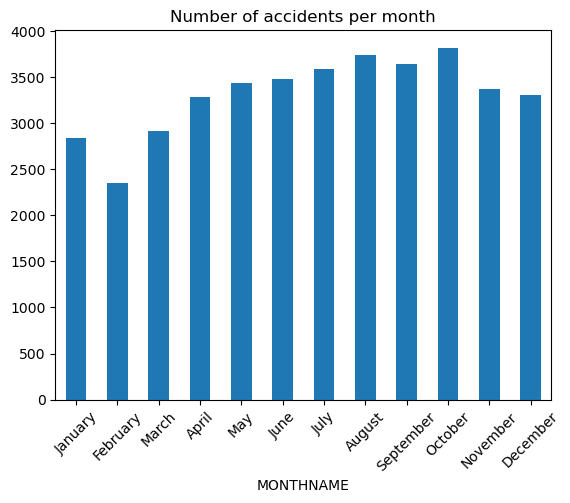

In [15]:
months_cat = ['January','February','March','April','May','June','July',
              'August','September','October','November','December']
df['MONTHNAME'].value_counts().reindex(months_cat).plot(kind='bar',
                                                        rot=45,
                                                        title='Number of accidents per month')
plt.show()

Statrting in February (the month with the fewest accidents), the amount increases until it reaches August, a slight decrease in September and reaches the maximum point in October, from which it decreases again until February.

Below you will see the distribution of deaths by the day of the week and then by month. To improve the quality of the graphs, a new variable called *MORTALITY* will be created that will encode the *FATALS* values. If there was only one victim in the accident, *MORTALITY* will be 0, if there was more than one, it will be 1.

In [16]:
df['MORTALITY'] = np.where(df['FATALS']==1, 0, 1)

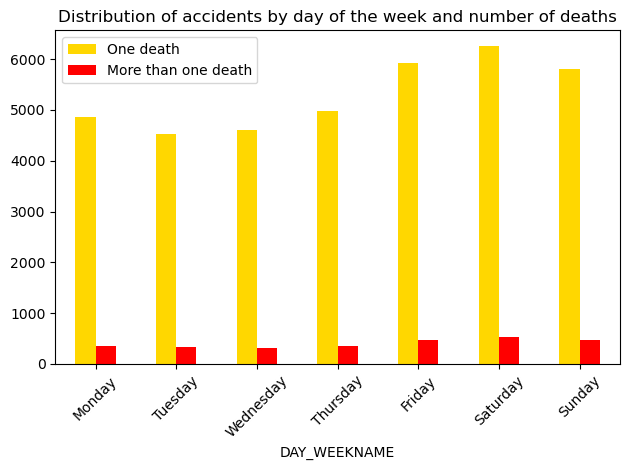

In [17]:
table = pd.crosstab(df['DAY_WEEKNAME'], df['MORTALITY']).reindex(days_cat)
table.plot(kind='bar', color=['gold','red'], rot=45)

plt.title("Distribution of accidents by day of the week and number of deaths")
plt.legend(["One death", "More than one death"])
plt.tight_layout()
plt.show()

The proportion of the two classes on each day is similar to that of the total. The only change, not very significant, is that on Tuesdays there is more than one fatality than on Wednesdays.

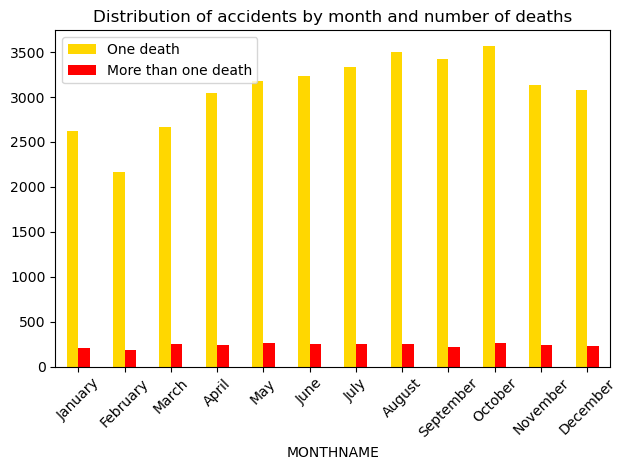

In [18]:
table = pd.crosstab(df['MONTHNAME'], df['MORTALITY']).reindex(months_cat)
table.plot(kind='bar', color=['gold','red'], rot=45)

plt.title("Distribution of accidents by month and number of deaths")
plt.legend(["One death", "More than one death"])
plt.tight_layout()
plt.show()

Although when there is only one fatality, visually the trend is the same, when there are more than one, September is the third month with the least amount of that type, while May is where the maximum is reached.

### Day segments

We are going to discretize the variable *HOUR* to separate it into four segments of equal amplitude:
- Night: (0-6]
- Morning: (6-12]
- Afternoon: (12-18]
- Evening: (18-24]

In [19]:
bins = [0, 6, 12, 18, 24]
labels = ['Night', 'Morning', 'Afternoon', 'Evening']
df['HOURDISC'] = pd.cut(df['HOUR'], bins=bins, labels=labels, right=False)
df['HOURDISC'].value_counts()

HOURDISC
Evening      13390
Afternoon    10887
Night         8055
Morning       7153
Name: count, dtype: int64

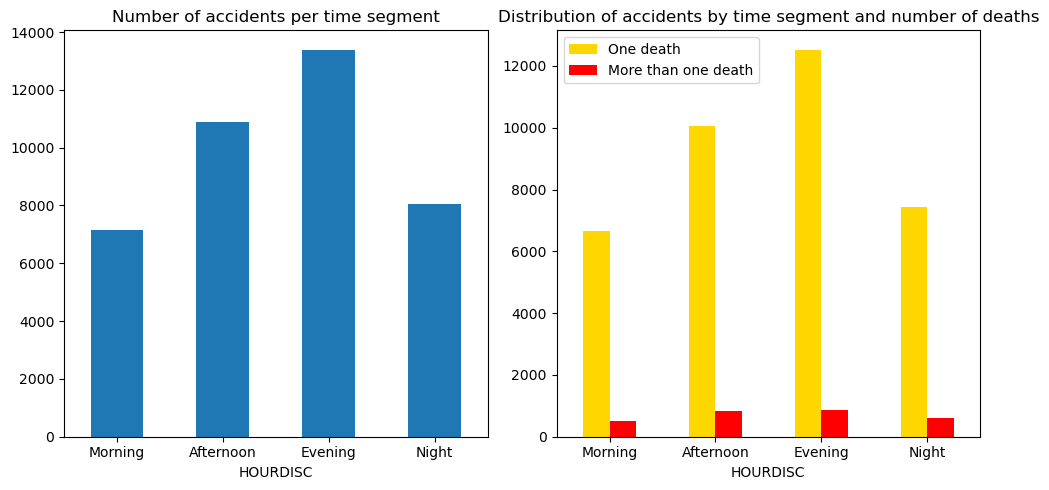

In [20]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(10,5))

hours_cats = ['Morning','Afternoon','Evening','Night']
df['HOURDISC'].value_counts().reindex(hours_cats).plot(kind='bar',
                                                      rot=0,
                                                      title='Number of accidents per time segment',
                                                      ax=ax[0])

table = pd.crosstab(df['HOURDISC'], df['MORTALITY']).reindex(hours_cats)
table.plot(kind='bar', color=['gold','red'], rot=0, ax=ax[1])
plt.title("Distribution of accidents by time segment and number of deaths")
plt.legend(['One death', 'More than one death'])

plt.tight_layout()
plt.show()

In [21]:
table

MORTALITY,0,1
HOURDISC,,
Morning,6651,502
Afternoon,10055,832
Evening,12527,863
Night,7436,619


The time of day with the most accidents is the evening, followed by the afternoon, segments where many people move and in which nightlife increases.

The proportion of *FATALS* follows the same trend for both classes, but the number of deaths greater than 1 in the afternoon almost equals those in the evening.

### Difference between time of accident and time of emergency arrival

In this section we will check the effectiveness of emergency services in an accident on the roads of the United States. The hour (*HOUR*) and minute (*MINUTE*) of the accident and the hour (*ARR_HOUR*) and minute (*ARR_MIN*) of the emergency arrival at the scene will be used.

Samples with valid values in those four columns are selected. There are values older than 24 hours and 60 minutes because those variables have not been reported or measured in those samples.

In [22]:
samples_time = np.where((df['HOUR']<=24) & (df['ARR_HOUR']<=24) &
                         (df['MINUTE']<=60) & (df['ARR_MIN']<=60))
samples_time = df.loc[samples_time]
len(samples_time)

17700

More than half of the original records had some erroneous value in one of the four variables.

Thanks to the `timdedelta()` function of the `datetime` library, the hours and minutes are combined to calculate the difference between the time of the incident and the time of the emergency arrival. These new values are assigned to *TIME_DIFF*.

In [23]:
samples_time['TIME_DIFF'] = np.nan
for i in samples_time.index:
    if (samples_time['ARR_HOUR'][i] > samples_time['HOUR'][i]) or \
       ((samples_time['ARR_HOUR'][i] == samples_time['HOUR'][i]) and \
        (samples_time['ARR_MIN'][i] >= samples_time['MINUTE'][i])):
        diff_time = dt.timedelta(hours=int(samples_time['ARR_HOUR'][i]),
                                 minutes=int(samples_time['ARR_MIN'][i])) - \
                    dt.timedelta(hours=int(samples_time['HOUR'][i]),
                                 minutes=int(samples_time['MINUTE'][i]))
    else:
        diff_time = dt.timedelta(hours=int(samples_time['ARR_HOUR'][i])+24,
                                 minutes=int(samples_time['ARR_MIN'][i])) - \
                    dt.timedelta(hours=int(samples_time['HOUR'][i]),
                                 minutes=int(samples_time['MINUTE'][i]))
    
    samples_time['TIME_DIFF'][i] = diff_time.total_seconds()/60

C:\Users\Alvaro\AppData\Local\Temp\ipykernel_11976\2535122424.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  samples_time['TIME_DIFF'][i] = diff_time.total_seconds()/60


In [24]:
samples_time[['HOUR','MINUTE','ARR_HOUR','ARR_MIN','TIME_DIFF']].head()

,HOUR,MINUTE,ARR_HOUR,ARR_MIN,TIME_DIFF
0,22,10,22,25,15.0
1,18,0,19,9,69.0
2,0,20,9,40,560.0
3,16,20,16,28,8.0
4,22,20,22,30,10.0


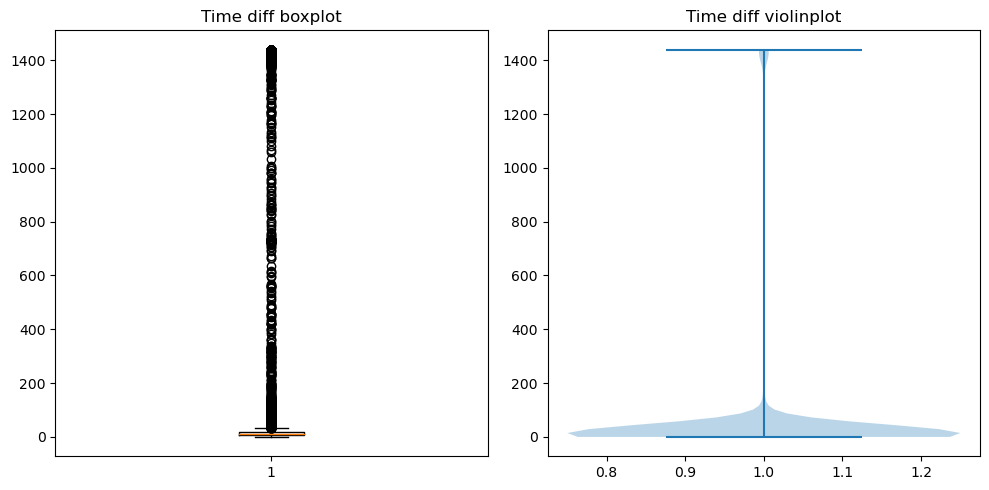

In [25]:
fig, ax = plt.subplots(1, 2, figsize=(10,5))

ax[0].boxplot(samples_time['TIME_DIFF'])
ax[0].set_title("Time diff boxplot")
ax[1].violinplot(samples_time['TIME_DIFF'])
ax[1].set_title("Time diff violinplot")
plt.tight_layout()
plt.show()

Most times they are close to 0. Above the violinplot a slight increase in points is observed. In those cases, either the emergency services have really taked almost a day or the data is poorly informed.

The data is then discretized into four segments of similar frequency with the `qcut` function to see if the tardiness causes an increase in deaths.

In [26]:
samples_time['DISC_TIMEDIFF'] = pd.qcut(x=samples_time['TIME_DIFF'], q=4)
samples_time['DISC_TIMEDIFF'].value_counts()

DISC_TIMEDIFF
(-0.001, 6.0]     4782
(6.0, 10.0]       4473
(17.0, 1439.0]    4323
(10.0, 17.0]      4122
Name: count, dtype: int64

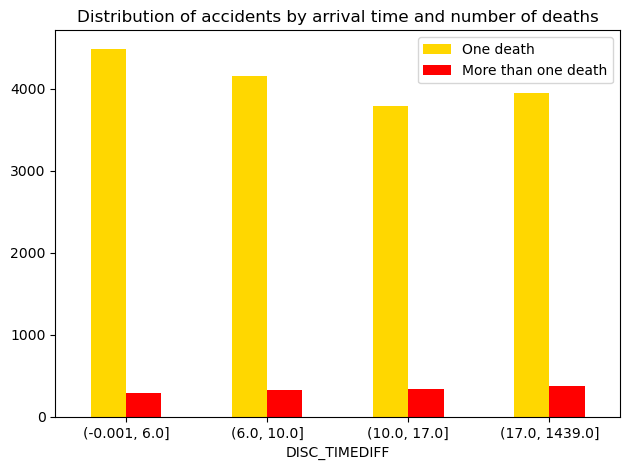

In [27]:
table = pd.crosstab(samples_time['DISC_TIMEDIFF'], samples_time['MORTALITY'])

table.plot(kind='bar', color=['gold','red'], rot=0, stacked=False)
plt.title("Distribution of accidents by arrival time and number of deaths")
plt.legend(['One death', 'More than one death'])
plt.tight_layout()
plt.show()

In [28]:
table

MORTALITY,0,1
DISC_TIMEDIFF,,
"(-0.001, 6.0]",4488,294
"(6.0, 10.0]",4151,322
"(10.0, 17.0]",3787,335
"(17.0, 1439.0]",3954,369


As can be seen from the first segment to the third, although there are fewer samples in total, due to the assignment made by `qcut`, the number of samples with more than one death has not decreased. And, regarding the last segment, although the number of samples increases, the proportion with more than one death is higher than that with only one death. Therefore, it can be said that there is a higher probability of a more number of people dying due to the accident if the emergency services take longer to reach the scene, as shown below.

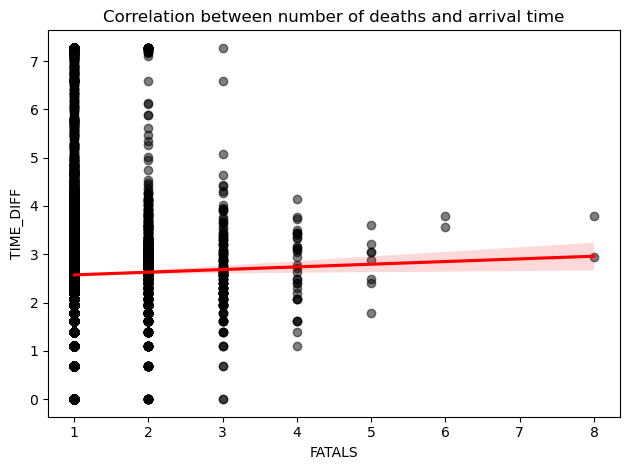

In [29]:
sns.regplot(x=samples_time['FATALS'], y=np.log(1+samples_time['TIME_DIFF']),
            scatter_kws = {"color":"black", "alpha":0.5},
            line_kws = {"color":"red"})
plt.title("Correlation between number of deaths and arrival time")
plt.tight_layout()
plt.show()

### Rural and urban area and route

*RUR_URBNAME* and *ROUTENAME* are analyzed.

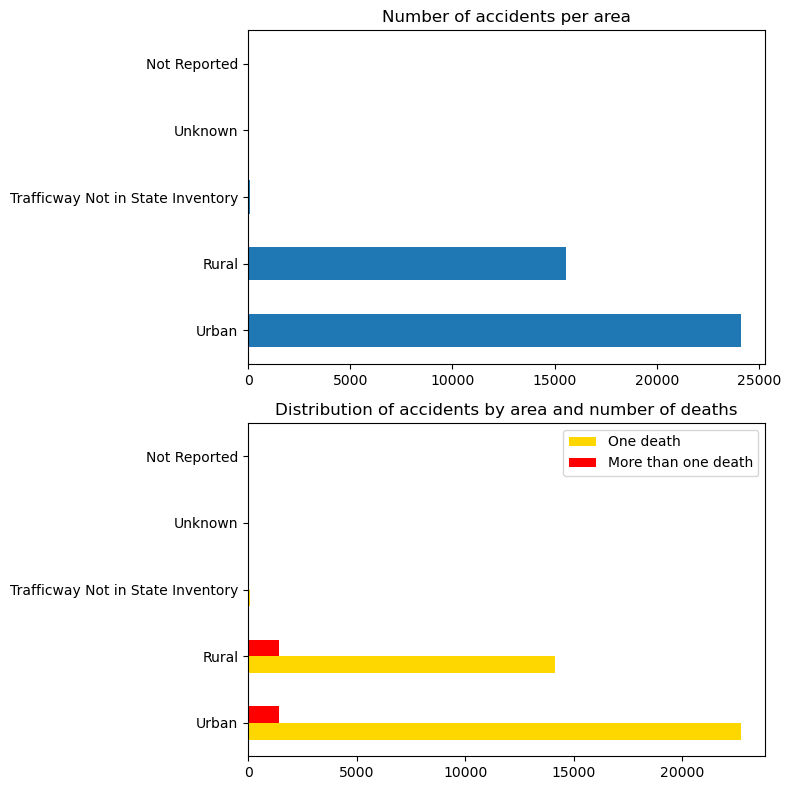

In [30]:
fig, ax = plt.subplots(nrows=2, ncols=1, figsize=(8,8))

df['RUR_URBNAME'].value_counts().plot(kind='barh',
                                      title='Number of accidents per area',
                                      ax=ax[0])

ax[0].set_ylabel('')

table = pd.crosstab(df['RUR_URBNAME'], df['MORTALITY'])
table = table.sort_index(key=table.sum(1).get, ascending=False)
table.plot(kind='barh', color=['gold','red'], ax=ax[1])
ax[1].set_ylabel('')
ax[1].set_title("Distribution of accidents by area and number of deaths")
ax[1].legend(['One death', 'More than one death'])

plt.tight_layout()
plt.show()

In [31]:
table

MORTALITY,0,1
RUR_URBNAME,,
Urban,22690,1409
Rural,14121,1427
Trafficway Not in State Inventory,69,3
Unknown,39,0
Not Reported,27,0


Around 60% of accidents occured in an urban area and 39% in a rural area. However, the number of accidents with more than one death in rural areas is higher than in urban areas. The rest correspond to values not reported, not included in the inventory or unknown.

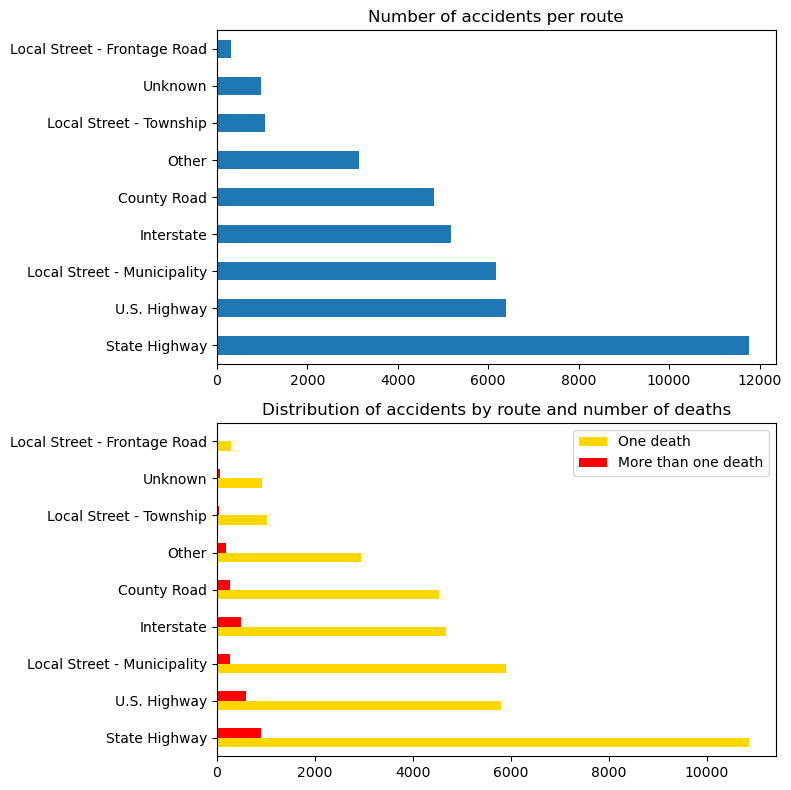

In [32]:
fig, ax = plt.subplots(nrows=2, ncols=1, figsize=(8,8))

df['ROUTENAME'].value_counts().plot(kind='barh',
                                    title='Number of accidents per route',
                                    ax=ax[0])

ax[0].set_ylabel('')

table = pd.crosstab(df['ROUTENAME'], df['MORTALITY'])
table = table.sort_index(key=table.sum(1).get, ascending=False)
table.plot(kind='barh', color=['gold','red'], ax=ax[1])
ax[1].set_ylabel('')
ax[1].set_title("Distribution of accidents by route and number of deaths")
ax[1].legend(['One death', 'More than one death'])

plt.tight_layout()
plt.show()

In [33]:
table

MORTALITY,0,1
ROUTENAME,,
State Highway,10862,905
U.S. Highway,5800,585
Local Street - Municipality,5895,278
Interstate,4673,498
County Road,4529,274
Other,2946,189
Local Street - Township,1028,40
Unknown,918,55
Local Street - Frontage Road,295,15


Approximately 30% of accidents happen on State Highway, followed by U.S. Highway and Local Street - Municipality. On the other hand, the percentage of accidents with one or more death compared to the total for each route is higher on the interstate and highways.

Below are some graphs relating *RUR_URBNAME*, *ROUTENAME*, and *MORTALITY*. To do this, only rural and urban areas are selected.

In [34]:
df_rur_urb = np.where((df['RUR_URBNAME']=='Rural') | (df['RUR_URBNAME']=='Urban'))
df_rur_urb = df.loc[df_rur_urb]
np.unique(df_rur_urb['RUR_URBNAME'])

array(['Rural', 'Urban'], dtype=object)

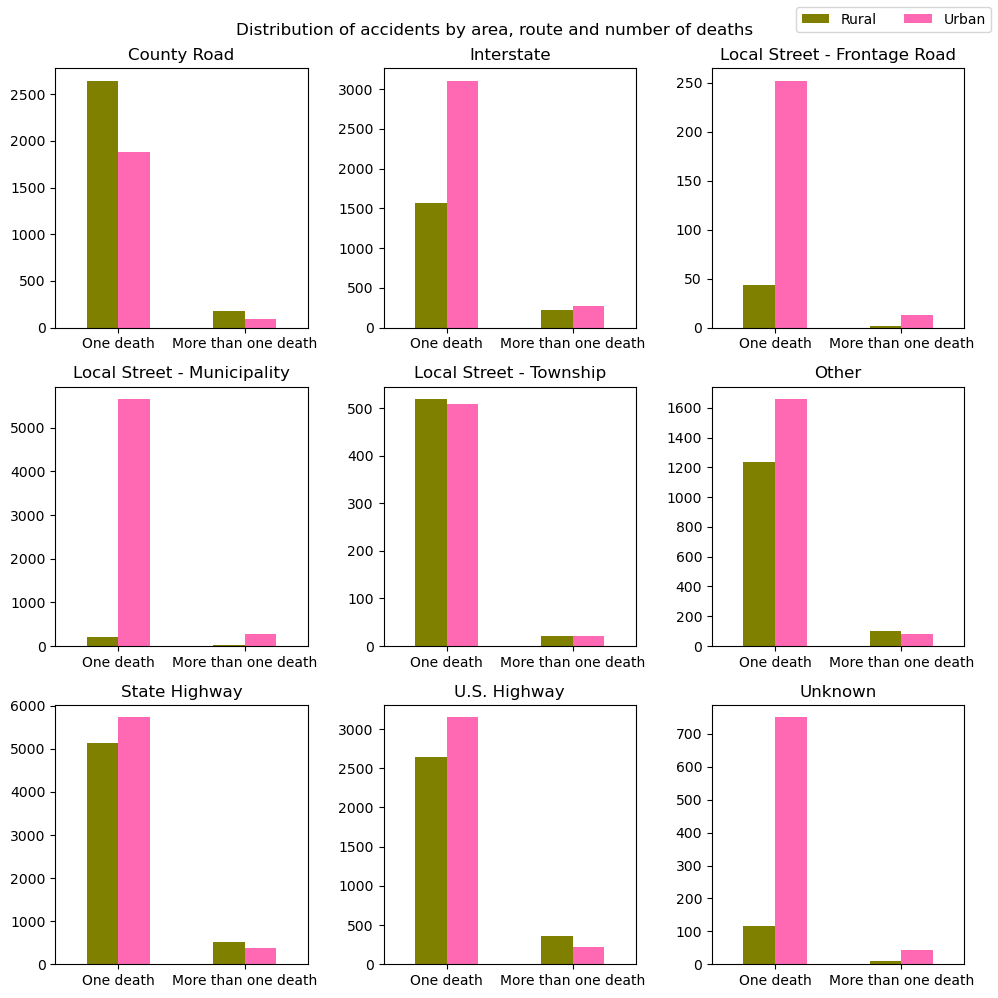

In [35]:
fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(10,10))
ax = axes.flatten()
fig.suptitle("Distribution of accidents by area, route and number of deaths")

for index, (routename, group) in enumerate(df_rur_urb.groupby('ROUTENAME')):
    table = pd.crosstab(group['MORTALITY'], group['RUR_URBNAME'])
    table.plot(kind='bar', rot=0, color=['olive','hotpink'], ax=ax[index])
    ax[index].set_title(routename)
    ax[index].set_xlabel('')
    ax[index].set_xticks(ticks=np.unique(group['MORTALITY']), labels=['One death', 'More than one death'])
    ax[index].get_legend().remove()

fig.legend(['Rural', 'Urban'], ncols=2)

plt.tight_layout()
plt.show()

- On State and U.S. Highway there is a larger urban area than rural area (not by much difference), but accidents with more than one death occupy a larger rural area.
- Accidents on interstate routes occupy twice as many urban areas as rural areas.
- More than 95% of accidents on Local Street-Municipality occur in urban areas.
- County roads and Local Streets-Township are the only routes where rural areas predominate.

### Light conditions and wather

*LGT_CONDNAME* and *WEATHERNAME* ara analyzed.

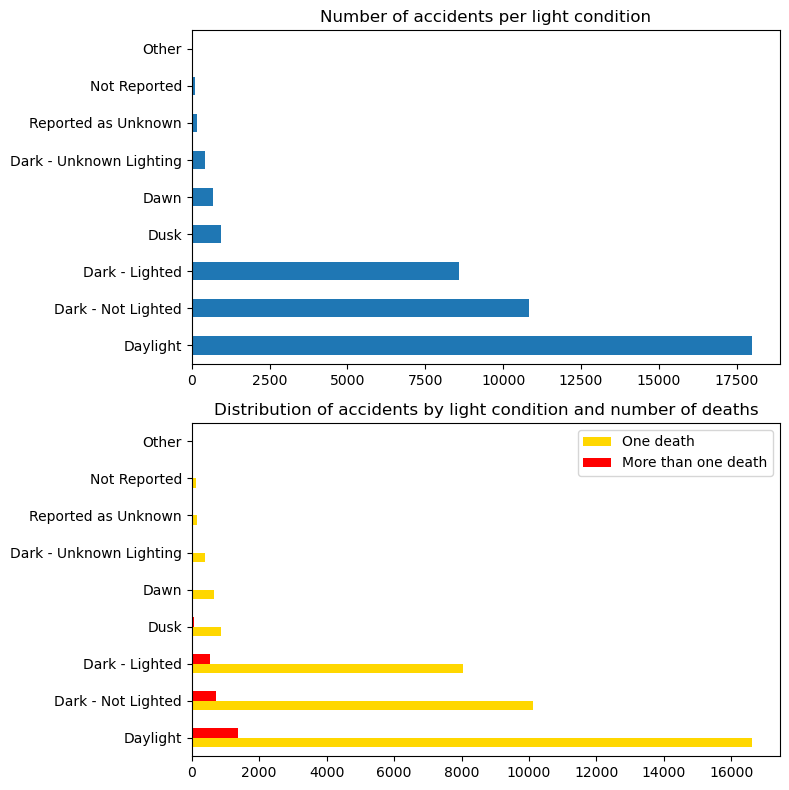

In [36]:
fig, ax = plt.subplots(nrows=2, ncols=1, figsize=(8,8))

df['LGT_CONDNAME'].value_counts().plot(kind='barh',
                                       title='Number of accidents per light condition',
                                       ax=ax[0])

ax[0].set_ylabel('')

table = pd.crosstab(df['LGT_CONDNAME'], df['MORTALITY'])
table = table.sort_index(key=table.sum(1).get, ascending=False)
table.plot(kind='barh', color=['gold','red'], ax=ax[1])
ax[1].set_ylabel('')
ax[1].set_title("Distribution of accidents by light condition and number of deaths")
ax[1].legend(['One death', 'More than one death'])

plt.tight_layout()
plt.show()

In [37]:
table

MORTALITY,0,1
LGT_CONDNAME,,
Daylight,16612,1374
Dark - Not Lighted,10109,729
Dark - Lighted,8038,554
Dusk,865,75
Dawn,646,50
Dark - Unknown Lighting,385,37
Reported as Unknown,150,19
Not Reported,115,1
Other,26,0


Around 45% of accidents occur in daylight, but more than 50% occur in the dark, of which a higher percentage occurs in not lighted areas. The ratio between the two *MORTALITY* classes is similar for all light conditions.

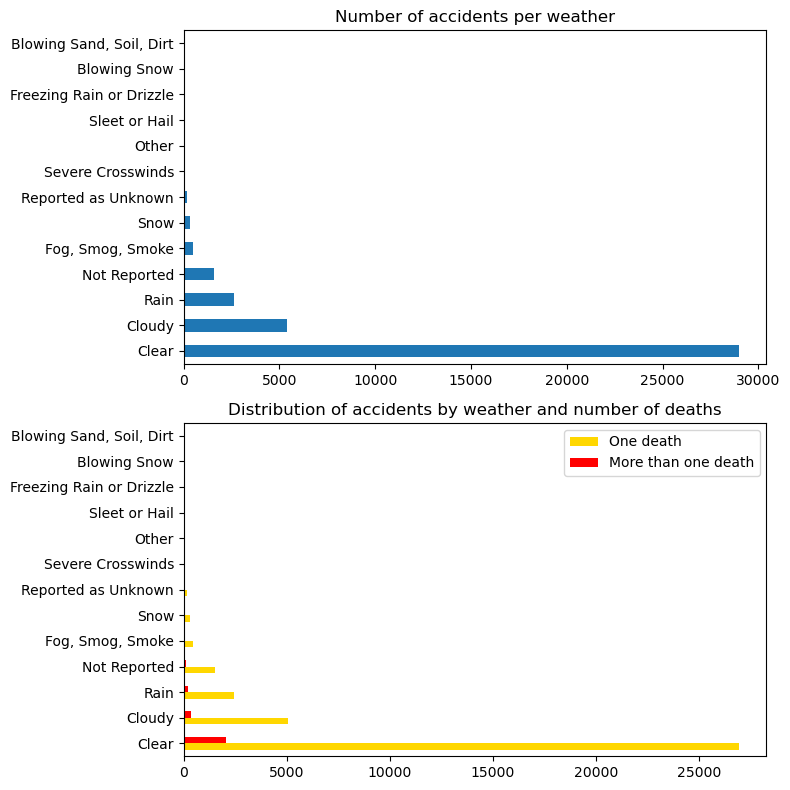

In [38]:
fig, ax = plt.subplots(nrows=2, ncols=1, figsize=(8,8))

df['WEATHERNAME'].value_counts().plot(kind='barh',
                                       title='Number of accidents per weather',
                                       ax=ax[0])

ax[0].set_ylabel('')

table = pd.crosstab(df['WEATHERNAME'], df['MORTALITY'])
table = table.sort_index(key=table.sum(1).get, ascending=False)
table.plot(kind='barh', color=['gold','red'], ax=ax[1])
ax[1].set_ylabel('')
ax[1].set_title("Distribution of accidents by weather and number of deaths")
ax[1].legend(['One death', 'More than one death'])

plt.tight_layout()
plt.show()

In [39]:
table

MORTALITY,0,1
WEATHERNAME,,
Clear,26912,2065
Cloudy,5038,375
Rain,2414,202
Not Reported,1494,110
"Fog, Smog, Smoke",442,34
Snow,284,21
Reported as Unknown,162,13
Severe Crosswinds,66,2
Other,41,5


More than 70% of accidents happen in clear weather, followed by cloudy weather with 14% and rain with 6.6%. Among these classes, the percentage of the red *MORTALITY* class is slightly higher in rain. There is also 20% of class 1 in the *Blowing, Sand, Soil, Dirt* cateogory, although only 15 accidents have been recorded in total.

### States

Finally, the states will be analyzed. First, the ten states with the highest number of accidents will be displayed in bar graphs and than two maps will be created thanks to the `geopandas` library.

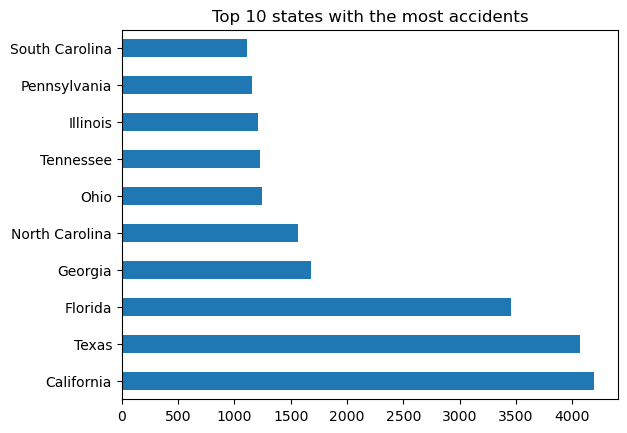

In [40]:
df['STATENAME'].value_counts()[:10].plot(kind='barh',
                                         title='Top 10 states with the most accidents',
                                         ylabel='')
plt.show()

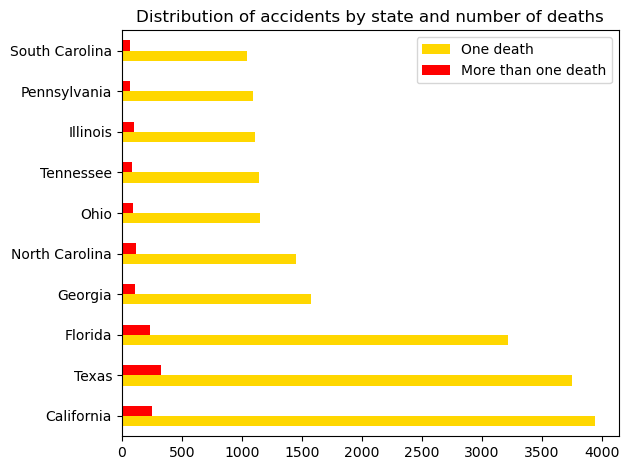

In [41]:
table = pd.crosstab(df['STATENAME'], df['MORTALITY']).reindex(df['STATENAME'].value_counts()[:10].index)
ax = table.plot(kind='barh',
                color=['gold','red'],
                title='Distribution of accidents by state and number of deaths',
                ylabel='')
ax.legend(['One death', 'More than one death'])
plt.tight_layout()
plt.show()

In [42]:
df['STATENAME'].value_counts()[:10]

STATENAME
California        4196
Texas             4070
Florida           3453
Georgia           1681
North Carolina    1563
Ohio              1242
Tennessee         1229
Illinois          1210
Pennsylvania      1153
South Carolina    1112
Name: count, dtype: int64

In [43]:
table

MORTALITY,0,1
STATENAME,,
California,3941,255
Texas,3747,323
Florida,3215,238
Georgia,1573,108
North Carolina,1449,114
Ohio,1147,95
Tennessee,1143,86
Illinois,1106,104
Pennsylvania,1089,64


According to GlobalData [[1]](#ref1), of the ten states the most accidents recorded, eight of them are in the top 10 states with the most population in 2021.

Of the ten countries in the bar graph, Illinois has the highest rate of accidents with more than one death in total, followed by Texas.

To make a static choropleth map using `geopandas` and `matplotlib`, the following article by Alex Rich [[2]](#ref2) has been very helpful: https://medium.com/@alex_44314/use-python-geopandas-to-make-a-us-map-with-alaska-and-hawaii-39a9f5c222c6

First, state geopatial data was downloaded through the US Census using the following command, although it can also be downloaded manually.

In [51]:
# Only runs the first time
wget.download("https://www2.census.gov/geo/tiger/GENZ2018/shp/cb_2018_us_state_500k.zip")


'cb_2018_us_state_500k.zip'

The folder is unzipped and the data saved in the *gdf* variable is read.

In [52]:
# Only runs the first time
file = 'cb_2018_us_state_500k.zip'
with ZipFile(file, 'r') as zObject:
    zObject.extractall('cb_2018_us_state_500k')

In [44]:
gdf = gdp.read_file(os.getcwd()+'/cb_2018_us_state_500k')
gdf.head()

,STATEFP,STATENS,AFFGEOID,GEOID,STUSPS,NAME,LSAD,ALAND,AWATER,geometry
0,28,01779790,0400000US28,28,MS,Mississippi,00,121533519481,3926919758,"MULTIPOLYGON (((-88.50297 30.21523, -88.49176 ..."
1,37,01027616,0400000US37,37,NC,North Carolina,00,125923656064,13466071395,"MULTIPOLYGON (((-75.72681 35.93584, -75.71827 ..."
2,40,01102857,0400000US40,40,OK,Oklahoma,00,177662925723,3374587997,"POLYGON ((-103.00257 36.52659, -103.00219 36.6..."
3,51,01779803,0400000US51,51,VA,Virginia,00,102257717110,8528531774,"MULTIPOLYGON (((-75.74241 37.80835, -75.74151 ..."
4,54,01779805,0400000US54,54,WV,West Virginia,00,62266474513,489028543,"POLYGON ((-82.64320 38.16909, -82.64300 38.169..."


Among other information, the dataframe contains the geometry of the states and their names, a column that will be used to join this data with the number of accidents that occured in each of them.

To do this, a dataframe is created with the name of the state and the number of accidents.

In [45]:
accidents_count = df['STATENAME'].value_counts()
accidents_count = pd.DataFrame({'STATENAME': accidents_count.index, 'ACCIDENTS':accidents_count.values})
accidents_count.head()

,STATENAME,ACCIDENTS
0,California,4196
1,Texas,4070
2,Florida,3453
3,Georgia,1681
4,North Carolina,1563


The two dataframes are joined thanks to the `merge` function and the columns with the full name of the states.

In [46]:
data_map = gdf.merge(accidents_count, left_on='NAME', right_on='STATENAME')
data_map.head()

,STATEFP,STATENS,AFFGEOID,GEOID,STUSPS,NAME,LSAD,ALAND,AWATER,geometry,STATENAME,ACCIDENTS
0,28,01779790,0400000US28,28,MS,Mississippi,00,121533519481,3926919758,"MULTIPOLYGON (((-88.50297 30.21523, -88.49176 ...",Mississippi,695
1,37,01027616,0400000US37,37,NC,North Carolina,00,125923656064,13466071395,"MULTIPOLYGON (((-75.72681 35.93584, -75.71827 ...",North Carolina,1563
2,40,01102857,0400000US40,40,OK,Oklahoma,00,177662925723,3374587997,"POLYGON ((-103.00257 36.52659, -103.00219 36.6...",Oklahoma,681
3,51,01779803,0400000US51,51,VA,Virginia,00,102257717110,8528531774,"MULTIPOLYGON (((-75.74241 37.80835, -75.74151 ...",Virginia,906
4,54,01779805,0400000US54,54,WV,West Virginia,00,62266474513,489028543,"POLYGON ((-82.64320 38.16909, -82.64300 38.169...",West Virginia,259


Finally, the map is created. To assign colors to each state, the data is normalized with the maximum and minimum number of accidents and the HEX color code of each state is obtained with the color map, in this case, *YlOrBr, which is assigned to each state in the new variable *value_determined_color*.

Then, the geographical coordinates are projected into two-dimensional space thanks to the `to_crs()` function.

Then, the figure, the legend, and the map are created, the latter by iterating through each row of the *data_map* dataframe, with the color corresponding to each state, except Alaska and Hawaii. Because these two states are separated and cause the display to take up a lot of empty spase, they are clip from the map using `Polygon()` function of the `Shapely` package and displayed below the conteminous United States.

C:\Users\Alvaro\anaconda3\Lib\site-packages\pyproj\crs\crs.py:141: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)


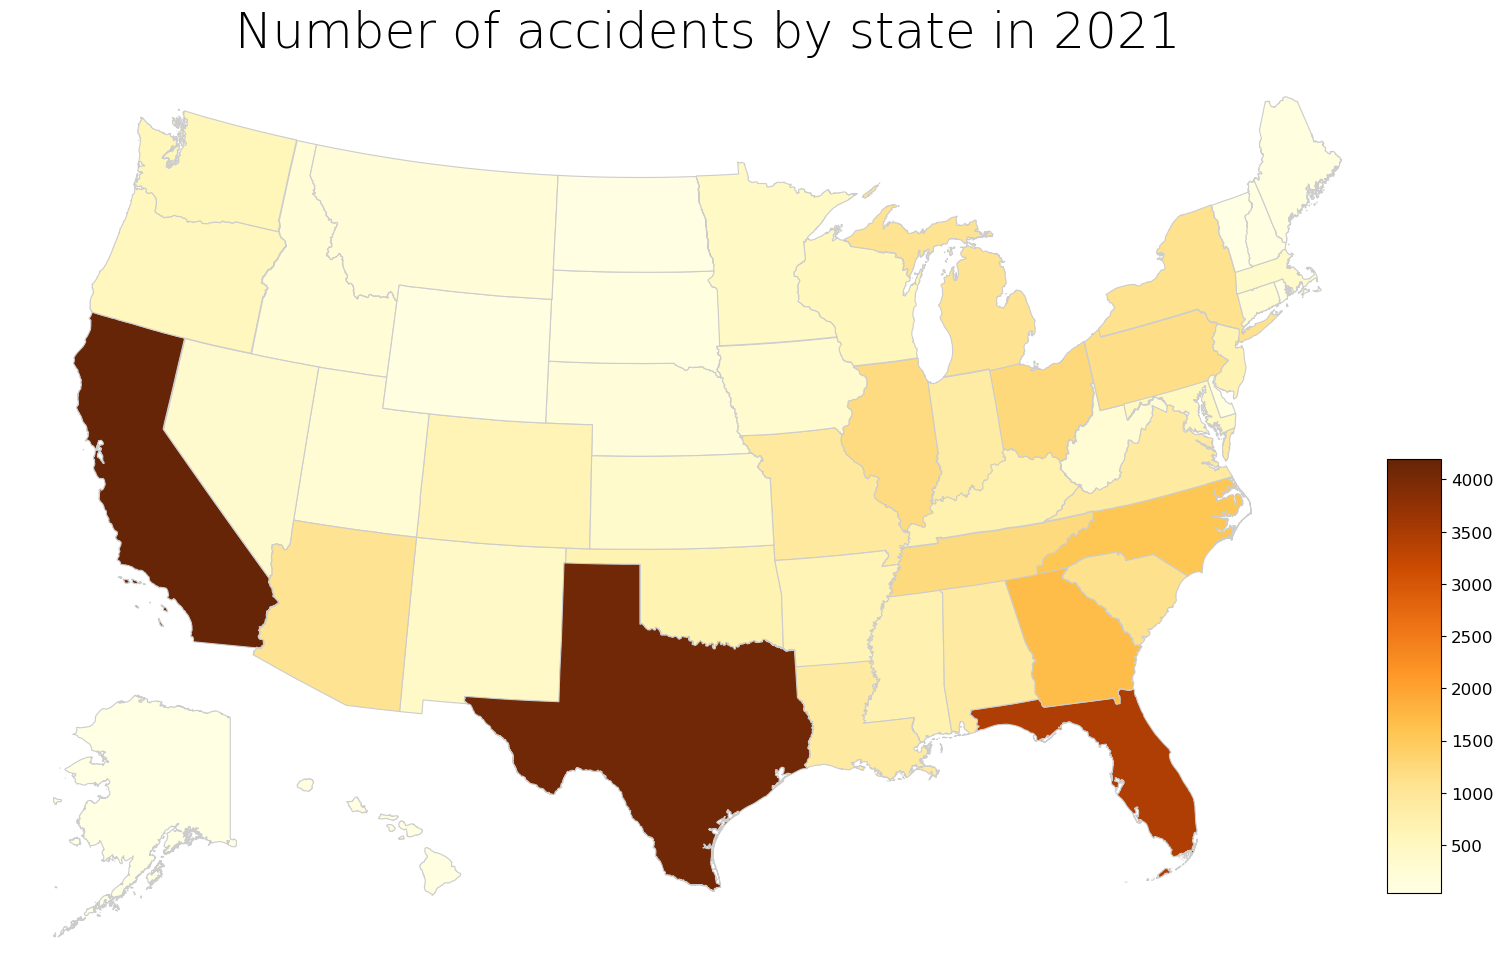

In [48]:
# set the value column that will be visualised
variable = 'ACCIDENTS'

# Create a new column "value_determined_color" to assign a color to all states based on the ACCIDENTS variable
# set the range for the choropleth values with the upper bound the rounded up maximum value
vmin, vmax = data_map.ACCIDENTS.min(), data_map.ACCIDENTS.max()

# Choose the continuous colorscale "YlOrBr" from https://matplotlib.org/stable/tutorials/colors/colormaps.html
colormap = "YlOrBr"

norm = mcolors.Normalize(vmin=vmin, vmax=vmax, clip=True)
mapper = plt.cm.ScalarMappable(norm=norm, cmap=plt.cm.YlOrBr)
data_map['value_determined_color'] = data_map[variable].apply(lambda x: mcolors.to_hex(mapper.to_rgba(x)))

# Create "visframe" as a re-projected data_map using EPSG 2163 for CONUS
visframe = data_map.to_crs({'init':'epsg:2163'})


# Create figure and axes
fig, ax = plt.subplots(1, figsize=(18, 14))
ax.axis('off')
ax.set_title('Number of accidents by state in 2021', fontdict={'fontsize':'36', 'fontweight':'1'})

# Create colorbar legend
fig = ax.get_figure()
cbax = fig.add_axes([0.89, 0.21, 0.03, 0.31])   
# add color scale
sm = plt.cm.ScalarMappable(cmap=colormap, \
                 norm=plt.Normalize(vmin=vmin, vmax=vmax))
# reformat tick labels
sm._A = []
fig.colorbar(sm, cax=cbax)
cbax.tick_params(labelsize=12)

# Create map
for row in visframe.itertuples():
    if row.STATENAME not in ['Alaska','Hawaii']:
        vf = visframe[visframe.STATENAME==row.STATENAME]
        c = data_map[data_map.STATENAME==row.STATENAME][0:1].value_determined_color.item()
        vf.plot(color=c, linewidth=0.8, ax=ax, edgecolor='0.8')



# add Alaska
akax = fig.add_axes([0.1, 0.17, 0.2, 0.19])   
akax.axis('off')
# polygon to clip Alaska
polygon = Polygon([(-170,50),(-170,72),(-140, 72),(-140,50)])
alaska_gdf = data_map[data_map.STATENAME=='Alaska']
alaska_gdf.clip(polygon).plot(color=data_map[data_map.STATENAME=='Alaska'].value_determined_color, linewidth=0.8,ax=akax, edgecolor='0.8')


# add Hawaii
hiax = fig.add_axes([.28, 0.20, 0.1, 0.1])   
hiax.axis('off')
# polygon to clip Hawaii
hipolygon = Polygon([(-160,0),(-160,90),(-120,90),(-120,0)])
hawaii_gdf = data_map[data_map.STATENAME=='Hawaii']
hawaii_gdf.clip(hipolygon).plot(color=data_map[data_map.STATENAME=='Hawaii'].value_determined_color, linewidth=0.8,ax=hiax, edgecolor='0.8')

# Save figure
fig.savefig(os.getcwd()+'/number_of_accidents_by_state_in_2021.png',dpi=400, bbox_inches="tight")

As expected, the three states that stand out the most are Texas, California and Florida.

To specifically observe the points where accidents were recorded in the United States, you can use the [smopy](https://github.com/rossant/smopy) library that is based on [OpenStreetMap](https://www.openstreetmap.org/). The latitude and longitude of each accident are used.

C:\Users\Alvaro\anaconda3\Lib\site-packages\smopy.py:140: RuntimeWarning: invalid value encountered in log
  ytile = f((1.0 - np.log(np.tan(lat_rad) + (1 / np.cos(lat_rad))) / np.pi) /


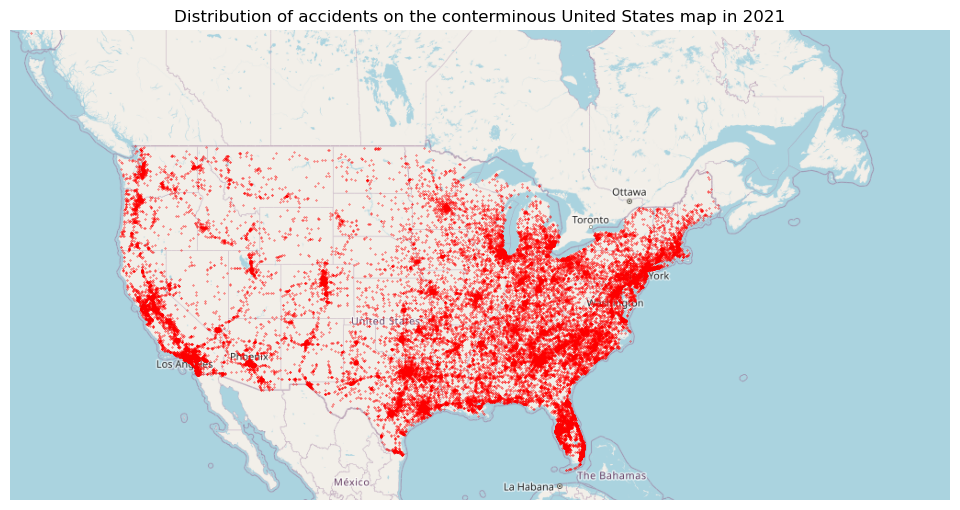

In [49]:
map = smopy.Map((30., -65, 50., -130), z=4)
ax = map.show_mpl(figsize=(10, 5))
ax.set_title('Distribution of accidents on the conterminous United States map in 2021')

for lat, lon in zip(df['LATITUDE'], df['LONGITUD']):
    x, y = map.to_pixels(lat, lon)
    ax.plot(x, y, 'or', ms=0.3)

The east of the country is painted much more red than the central part and the west. Therefore, in the east there are many more sections and places of accidents with fatalities.

Note: if there is a specific point where accidents predominate (same recorded latitude and longitude), the points are superimposed on them.

## Conclusions

The data studied includes fatal traffic accidents on road networks in the United States in 2021. The records have a wide variety of fields, some of which have been visualized and analyzed.

More than 92% of registered accidents had a single fatality. The rest decreased from 2 to 13 deaths. The variable has been related to those that identify the different vehicles and the people involved. The correlation graphs confirmed that as the number of motor vehicles in transport increased, the number of people traveling in them increased, and there was a greater probability that the number of deaths would increase.

Regarding days, weekends and Fridays have more accidents since there is more nightlife. By dividing the days into four segments of equal width, between 6 and 12 in the afternoon there are more accidents, due to returning home and, again, to nightlife. However, approximately half of accidents occur in daylight and the other half in the dark, more so when the place is not iluminated. And more than 72% in clear weather.

Regarding the months, the month with the most accidents recorded in 2021 was October, followed by the summer months. As is normal, vacations generate more trips and, therefore, a greater risk of accidents.

Regarding the difference in time from when the accident occurs until the emergency services arrive at the scene, it can be said that it is an important variable. The delay of these medical teams can be vital to saving a life in serious conditions. The longer it takes, the more likely is that the person in critical condition will die.

Urban areas concentrate a greater number of accidents than rural areas, but these are where there are more accidents with two or more deaths, as occurs on highways or county roads. As expected, roads or streets with more traffic and where vehicles can reach higher speeds are where more accidents occur.

Finally, it has been observed that Texas, California, and Florida are the three states with the most accidents through two bar graphs, a choropleth map and another with the distribution of accidents throughout the country.

## References

<a id="ref1"> </a>
[1] GlobalData. *Most Populated States in the United States in 2021.* [Online]. Available in: https://globaldata.com/data-insights/macroeconomic/most-populated-states-in-the-us/

<a id="ref2"> </a>
[2] Rich, A. (2023). *Use Python geopandas to make a US map with Alaska and Hawai.* [Online]. Available in: https://medium.com/@alex_44314/use-python-geopandas-to-make-a-us-map-with-alaska-and-hawaii-39a9f5c222c6